## Thyroid disease detection

### Table of content
- Introduction
- Executive summary
- Data and methods
- Data cleaning and feature engineering
- EDA
- Model training
- Conclusion
- Future recommendation

## Introduction
Thyroid is an important butterfly shaped gland present in front of our neck. This gland produce thyroid hormone
which is reponsible for controlling and maintaining essential functions of our body such as metablism.
Due to many reasons funcitoning of thyroid gland may get affected. The two main abnormalities of thyroid gland is 
hypothyroidism and hyperthyroidism. In hyperthyroidism there may be excess production of thyroid hormones 
whereas in hypothyroidism there may be less produciton of thyroid hormone.
Now it is very difficult to diagnose thyroid disorder just by looking sign and symptoms. so, laboratory test 
are important to diagnose thyroid disorder.

## Executive Summary

## Data and Methods
we got this dataset from UCI Machine repository named 'Thyroid Disease'. There are many databases in this repository.
But we are working with dataset named thyroid0387.txt. 
This dataset contain 29 independent columns and one dependent columns. Dependent column is having categorical featueres with 7 classes. 
There are 9173 rows. 



1. Data Summary and Overview. 
2. check columns for missing values, if missing column have more than 50% missing data than dorp it. 
3. Drop the "measured" columns as measurement are already available. 
4. Replace M:0 and F:1, f:0 and t:1. 
5. Check for outliers values.       
6. Ecnode "referal_code using" get_dummies(). 
7. convert the classes into encodings. 
8. Check for categorical columns for unexpected value 
9. check numerical column for outlier  
10. apply imputers to replace missing values. 
11. Check for numerical and categorical features, (categorical can be converted to OHV) 
12. check for duplicate data 
13. visualize various features to check for distribution. if distribution is not proper apply log transform. 
14. check the points that belong to classes. if imbalanced  appy over sampling techniques. 

## Data Cleaning and Feature Engineering

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%pwd

'c:\\Users\\hp\\Desktop\\Thyroid-disease-detection\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\hp\\Desktop\\Thyroid-disease-detection'

In [5]:
file_path = r'C:\Users\hp\Desktop\Thyroid-disease-detection\artifact\ingested_data\data.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [7]:
df.shape

(29949, 30)

In [8]:
df.info()
#age is float and all other columns are object/string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29949 entries, 0 to 29948
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        29949 non-null  object
 1   sex                        29949 non-null  object
 2   on_thyroxine               29949 non-null  object
 3   query_on_thyroxine         29949 non-null  object
 4   on_antithyroid_medication  29949 non-null  object
 5   sick                       29949 non-null  object
 6   pregnant                   29949 non-null  object
 7   thyroid_surgery            29949 non-null  object
 8   I131_treatment             23916 non-null  object
 9   query_hypothyroid          29949 non-null  object
 10  query_hyperthyroid         29949 non-null  object
 11  lithium                    29949 non-null  object
 12  goitre                     29949 non-null  object
 13  tumor                      29949 non-null  object
 14  hypopi

### case noramlization
convert all to lower case


In [9]:
# Convert all object columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\1080545349.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41,f,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,svhc,negative
1,23,f,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,m,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,f,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,f,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,svi,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,77.0,f,0,0,0,0,0,0,0,0,...,t,12.5,t,10.7,t,11.700000000000001,NaN,NaN,NaN,negative
29945,41.0,f,0,0,0,0,0,0,0,0,...,t,12.5,t,11.4,t,10.9,NaN,NaN,NaN,negative
29946,88.0,f,0,0,0,0,0,0,0,0,...,t,12.3,t,9.9,t,12.4,NaN,NaN,NaN,hypothyroid
29947,64.0,m,0,0,0,0,0,0,0,0,...,t,10.6,t,8.799999999999999,t,12.1,NaN,NaN,NaN,negative


In [10]:
for i in df.columns:
    print(f'{i}: {df[i].unique()}')

age: ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92' '9' '97' '65511' '95' '65512' '3'
 '65526' '98' '28.999999999999996' '32.0' '35.0' '21.0' '22.0' '39.0'
 '77.0' '23.0' '45.0' '65.0' '53.0' '79.0' '56.99999999999999' '54.0'
 '61.0' '14.000000000000002' '55.00000000000001' '59.0' '60.0' '73.0'
 '56.00000000000001' '38.0' '42.0' '78.0' '64.0' '52.0' '81.0' '75.0'
 '36.0' '51.0' '76.0' '70.0' '87.0' '63.0' '40.0' '16.0'
 '28.000000000000004' '26.0' '25.0' '27.0' '69.0' '62.0' '67.0' '71.0'
 '66.0' '85.0' '43.0' '46.0' '48.0' '24.0' '31.0' '68.0' '74.0' '44.0'
 '52.1900000

In [11]:
df.duplicated().sum()

9884

In [12]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [13]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()

In [14]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Replace 'y' with 't' and 'n' with 'f'
df.replace({'y': 't', 'n': 'f'}, inplace=True)

#Replace '0' with 'f' and '1' with 't'
columns_to_replace = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid','query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

for column in columns_to_replace:
    df[column].replace({'0': 'f', '1': 't'}, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\2259538934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', np.nan, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7112\2259538934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'y': 't', 'n': 'f'}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7112\2259538934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].replace({'0': '

In [15]:
df.isnull().sum().sum()
#There are 14,659 missing values

55537

In [16]:
#Handling missing values
df.isnull().sum().sort_values(ascending=False)

TBG                          19470
referral_source              10355
TBG_measured                  7129
T3                            3467
psych                         3226
hypopituitary                 3226
I131_treatment                3226
TSH                           1419
T4U                           1186
FTI                           1178
TT4                            796
age                            453
sex                            406
goitre                           0
T4U_measured                     0
on_thyroxine                     0
query_on_thyroxine               0
on_antithyroid_medication        0
sick                             0
FTI_measured                     0
pregnant                         0
thyroid_surgery                  0
tumor                            0
TT4_measured                     0
query_hypothyroid                0
T3_measured                      0
query_hyperthyroid               0
TSH_measured                     0
lithium             

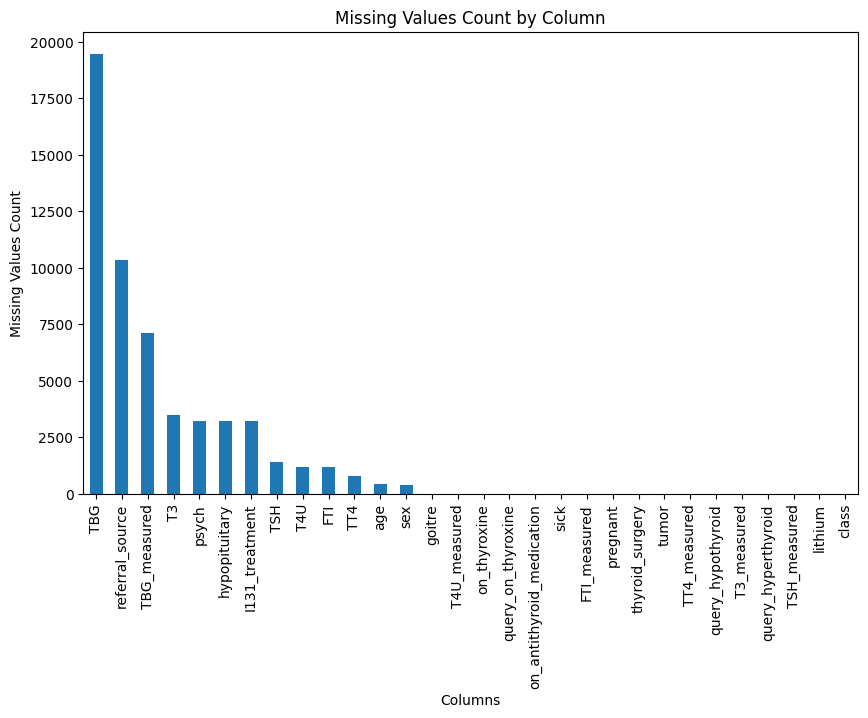

In [17]:
missing_values_count = df.isnull().sum().sort_values(ascending=False)
missing_values_count.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

drop those columns that have more than 50% of missing values as they would otherwise make our model biased even if we try to impute mean or median values.

In [17]:
threshold = 0.5
column_threshold = int(0.5 * len(df))
column_threshold

10032

In [18]:
# Drop columns with more missing values than the threshold
df = df.dropna(axis=1, thresh=column_threshold)

In [19]:
df.shape

(20065, 28)

we now have 28 columns remaining and rest two columns are dropped becuase of 50% or more missing values

## Dropping the measured columns
we are dropping the measured columns because we have already obtained the measurements values.
but before dropping the measurements we need to replace the false measurements values with 0 and in case if TRUE value is also missing then we can do mean value replacement.

In [20]:
# check for missing TRUE and FALSE values in TT4 data
tt4_missing_values_true = df.loc[df['TT4_measured'] == 't', 'TT4'].isnull().sum()
tt4_missing_values_false = df.loc[df['TT4_measured'] == 'f', 'TT4'].isnull().sum()


In [21]:
print(tt4_missing_values_true)
print(tt4_missing_values_false)


0
796


we can confirm that for this column no TRUE values are missing, we can replace false values with 0 as this test is not conducted

In [22]:
df.shape

(20065, 28)

In [23]:
# replacing the false values with 0 
df.loc[df['TT4_measured'] == 'f', 'TT4'] = df['TT4'].fillna(0)

In [24]:
tt4_missing_values_false = df.loc[df['TT4_measured'] == 'f', 'TT4'].isnull().sum()
tt4_missing_values_false

0

#### TSH false value replacement

In [25]:
# check for missing TRUE and FALSE values in TT4 data
tsh_missing_values_true = df.loc[df['TSH_measured'] == 't', 'TSH'].isnull().sum()
tsh_missing_values_false = df.loc[df['TSH_measured'] == 'f', 'TSH'].isnull().sum()
print(tsh_missing_values_true)
print(tsh_missing_values_false)

0
1419


In [26]:
df.loc[df['TSH_measured'] == 'f', 'TSH'] = df['TSH'].fillna(0)

#### T3 false value replacement

In [27]:
# check for missing TRUE and FALSE values in TT4 data
t3_missing_values_true = df.loc[df['T3_measured'] == 't', 'T3'].isnull().sum()
t3_missing_values_false = df.loc[df['T3_measured'] == 'f', 'T3'].isnull().sum()
print(t3_missing_values_true)
print(t3_missing_values_false)

0
3467


In [28]:
df.loc[df['T3_measured'] == 'f', 'T3'] = df['T3'].fillna(0)

#### FTI false value replacement

In [29]:
# check for missing TRUE and FALSE values in FTI data
FTI_missing_values_true = df.loc[df['FTI_measured'] == 't', 'FTI'].isnull().sum()
FTI_missing_values_false = df.loc[df['FTI_measured'] == 'f', 'FTI'].isnull().sum()
print(FTI_missing_values_true)
print(FTI_missing_values_false)

0
1178


In [30]:
df.loc[df['FTI_measured'] == 'f', 'FTI'] = df['FTI'].fillna(0)

#### TT4 false values replacement


In [31]:
# check for missing TRUE and FALSE values in T4U data
T4U_missing_values_true = df.loc[df['T4U_measured'] == 't', 'T4U'].isnull().sum()
T4U_missing_values_false = df.loc[df['T4U_measured'] == 'f', 'T4U'].isnull().sum()
print(T4U_missing_values_true)
print(T4U_missing_values_false)

0
1186


In [32]:
df.loc[df['T4U_measured'] == 'f', 'T4U'] = df['T4U'].fillna(0)

now again check for missing values

In [33]:
df.isnull().sum().sort_values(ascending=False)

TBG_measured                 7129
hypopituitary                3226
I131_treatment               3226
psych                        3226
age                           453
sex                           406
sick                            0
TSH                             0
on_thyroxine                    0
FTI                             0
FTI_measured                    0
T4U                             0
T4U_measured                    0
TT4                             0
TT4_measured                    0
T3                              0
T3_measured                     0
TSH_measured                    0
pregnant                        0
query_on_thyroxine              0
tumor                           0
goitre                          0
lithium                         0
query_hyperthyroid              0
query_hypothyroid               0
on_antithyroid_medication       0
thyroid_surgery                 0
class                           0
dtype: int64

In [34]:

counts = df['hypopituitary'].value_counts()
counts
#we can replace missing value with 'f' as almost all given values are 'f' 

df['psych'].value_counts()
#here as well we can replace missing value with 'f'

df['I131_treatment'].value_counts()
#here as well we can replace missing value with 'f'

df['sex'].value_counts()
#for sex let's do mode imputation and for age do mean imputation

sex
f    13638
m     6021
Name: count, dtype: int64

In [35]:
mode_columns = ['hypopituitary', 'I131_treatment', 'psych','sex']
for column in mode_columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].fillna(mode_value, inplace=True)

#convert age to numeric data
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# median_imputation

median_value = df['age'].median()  # Calculate the mean of the 'sex' column
df['age'].fillna(median_value, inplace=True)



In [36]:
df1=df

In [37]:
df.isnull().sum().sort_values(ascending=False)
#only TBG_measured column is remianig which we will  drop 

TBG_measured                 7129
age                             0
sex                             0
FTI                             0
FTI_measured                    0
T4U                             0
T4U_measured                    0
TT4                             0
TT4_measured                    0
T3                              0
T3_measured                     0
TSH                             0
TSH_measured                    0
psych                           0
hypopituitary                   0
tumor                           0
goitre                          0
lithium                         0
query_hyperthyroid              0
query_hypothyroid               0
I131_treatment                  0
thyroid_surgery                 0
pregnant                        0
sick                            0
on_antithyroid_medication       0
query_on_thyroxine              0
on_thyroxine                    0
class                           0
dtype: int64

We can now observe that the we do not have any missing values, now we can drop the 'measured' columns

In [38]:

drop_cols = ['TBG_measured', 'FTI_measured','TT4_measured', 'T3_measured','TSH_measured','T4U_measured']
df.drop(columns=drop_cols, inplace=True)

In [39]:
df.shape

(20065, 22)

In [40]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,f,f,f,f,f,f,f,f,f,...,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23.0,f,f,f,f,f,f,f,f,f,...,f,f,f,f,4.1,2,102,0,0,negative
2,46.0,m,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,0,109,0.91,120,negative
3,70.0,f,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175,0,0,negative
4,70.0,f,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61,0.87,70,negative


In [41]:
df.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                           object
T3                            object
TT4                           object
T4U                           object
FTI                           object
class                         object
dtype: object

In [42]:
#convert hormonal values to numeric datatype
numeric_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [42]:
# Find categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'sex': ['f' 'm']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_medication': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['f' 't']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'class': ['negative' 'hyperthyroid' 'hypothyroid']


here we do not see any null as unique value so, it means that our missing value is complete

## Outliers detection and removal

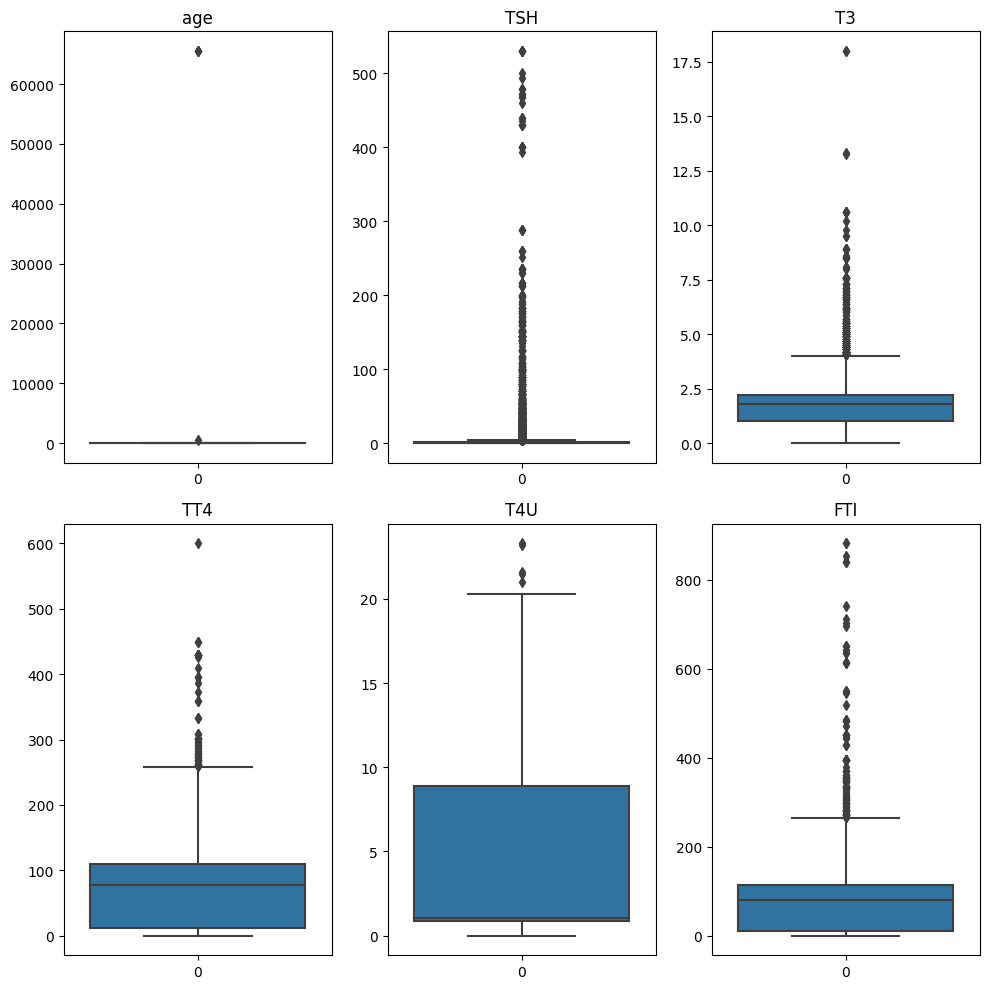

In [43]:
#Boxplot to detect outlier
numerical_col = df.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

we can observe that "AGE" column have a very large outlier value we can replace these values

In [44]:
# Calculate IQR for the 'age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [45]:
# Remove outliers from the 'age' column
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


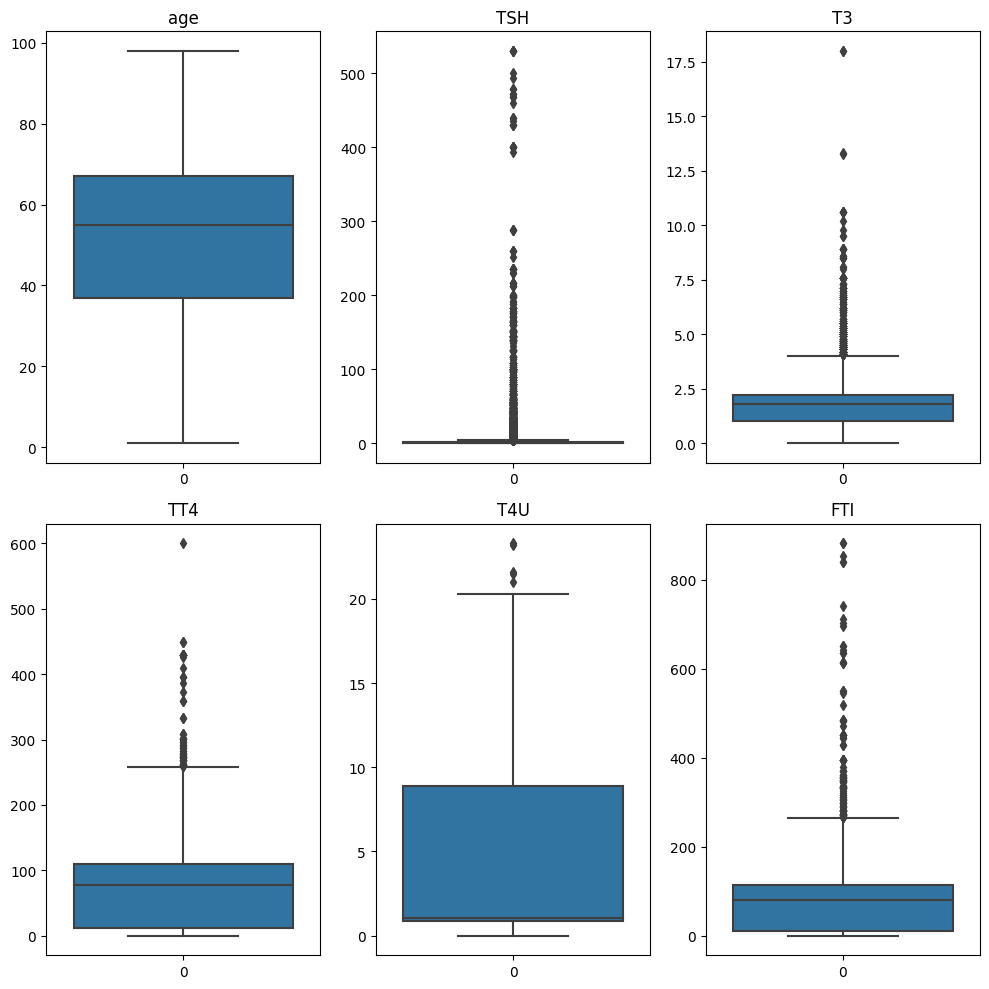

In [45]:
#Boxplot to detect outlier
numerical_col = df.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

ok now we can observe that the age parameter is well distributed and free from outliers, originally we had 11972 now after removing outliers AGE we have 11967 data points, only 5 points removed: not a big loss.


Lets check the distribution as well

In [46]:
numerical_col=df.select_dtypes(exclude=['object'])
numerical_col.shape

(20061, 6)

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

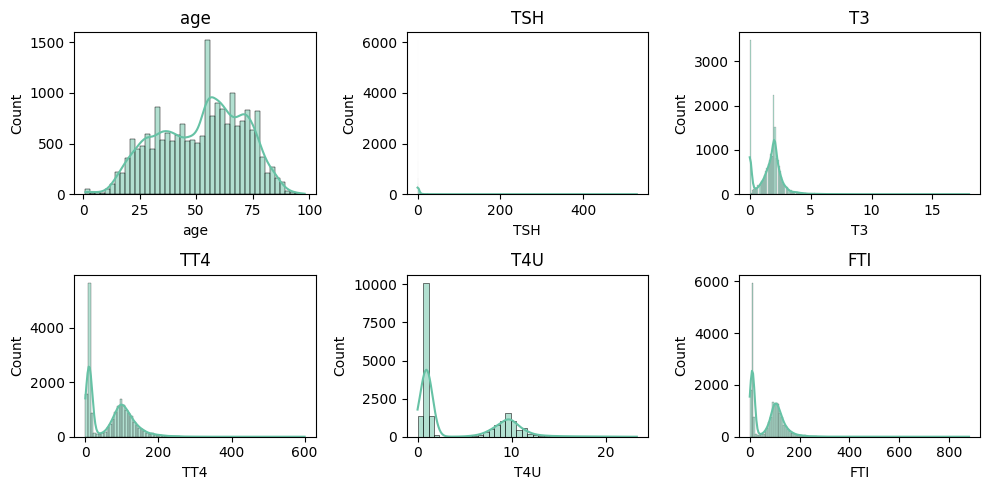

In [47]:
sns.set_palette("Set2")
fig,axes=plt.subplots(2,3,figsize=(10,5))
for ax,column in zip(axes.flatten(),numerical_col.columns):
    sns.histplot(data=df,x=column,ax=ax,kde=True)
    ax.set_title(column, fontsize=12)
plt.tight_layout()


In [46]:
# numerical_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
# # Apply log transformation to the selected columns
# transformed_data = df[numerical_columns].apply(np.log1p)


# # Combine transformed data with the rest of the columns
# data_frame_transformed = pd.concat([df.drop(columns=numerical_columns), transformed_data], axis=1)




In [ ]:
# numerical_col = data_frame_transformed.select_dtypes(include=['float64'])
# sns.set_palette("Set2")
# fig,axes=plt.subplots(2,3,figsize=(10,5))
# for ax,column in zip(axes.flatten(),numerical_col.columns):
#     sns.histplot(data=data_frame_transformed,x=column,ax=ax,kde=True)
#     ax.set_title(column, fontsize=12)
# plt.tight_layout()


In [47]:
df.shape

(20061, 22)

now lets try to work with outliers on TSH columns, find out the %age of TSH points which are greater than 50 with whole datapoint

In [48]:
filtered_data = df[
    (df['TSH'] > 50) 
]

# Create a new DataFrame with only the selected class names
new_data_frame = filtered_data[['class', 'TSH']]

new_data_frame

,class,TSH
88,negative,160.0
116,negative,151.0
224,negative,143.0
259,negative,108.0
282,negative,86.0
...,...,...
22624,negative,71.0
22648,negative,183.0
22659,negative,57.0
22713,negative,143.0


if keep ideal threshold like > 50 then we have got 330 rows, now let's try using z-score

In [49]:
(new_data_frame.shape[0]/df.shape[0])*100

1.6449828024525197

number of outliers is nearly 1.5 of whole data, but lets do a z-score test and remove all the outliers that are above or below the 3 standard deviations

In [50]:
# Calculate Z-scores for the 'TSH' column
z_scores = np.abs((df['TSH'] - df['TSH'].mean()) / df['TSH'].std())

print(z_scores)
# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

print("Outliers:")
print(outliers)

0        0.128169
1        0.002906
2        0.142485
3        0.179169
4        0.154116
           ...   
29944    0.186058
29945    0.180511
29946    0.128169
29947    0.182837
29948    0.177872
Name: TSH, Length: 20061, dtype: float64
Outliers:
        age sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
88     39.0   f            f                  f                         f   
116    50.0   m            f                  f                         f   
224    79.0   f            f                  f                         f   
259    63.0   m            f                  f                         f   
282    70.0   m            f                  f                         f   
...     ...  ..          ...                ...                       ...   
22253  15.0   f            t                  f                         f   
22260  53.0   f            f                  f                         f   
22370  62.0   f            f                  f           

observe that with z-score thresholds greater than 3 we have only 227 obserations removed, which much better than keeping hard thresholds

In [51]:
removal_count = 0
removal_count += outliers.shape[0]
removal_count

227

In [52]:
df1=df
df1.shape

(20061, 22)

In [53]:
df = df1

In [54]:
df.shape

(20061, 22)

In [55]:
# Select the numerical columns from the dataset
numerical_cols = [ 'TT4','TSH', 'T3', 'T4U', 'FTI']

# Define a threshold for identifying outliers (e.g., Z-score > 2)
threshold = 3

# Iterate over the columns and remove outliers
non_outliers_data_frame = df.copy()  # Create a copy to store non-outliers
for column in numerical_cols:
    z_scores = np.abs((non_outliers_data_frame[column] - non_outliers_data_frame[column].mean()) / non_outliers_data_frame[column].std())
    non_outliers_data_frame = non_outliers_data_frame[(z_scores <= threshold)]
    #removal_count += non_outliers_data_frame.shape[0]

print("DataFrame without outliers:")
#print(non_outliers_data_frame)


DataFrame without outliers:


In [56]:
non_outliers_data_frame.shape

(19454, 22)

In [57]:
data = non_outliers_data_frame

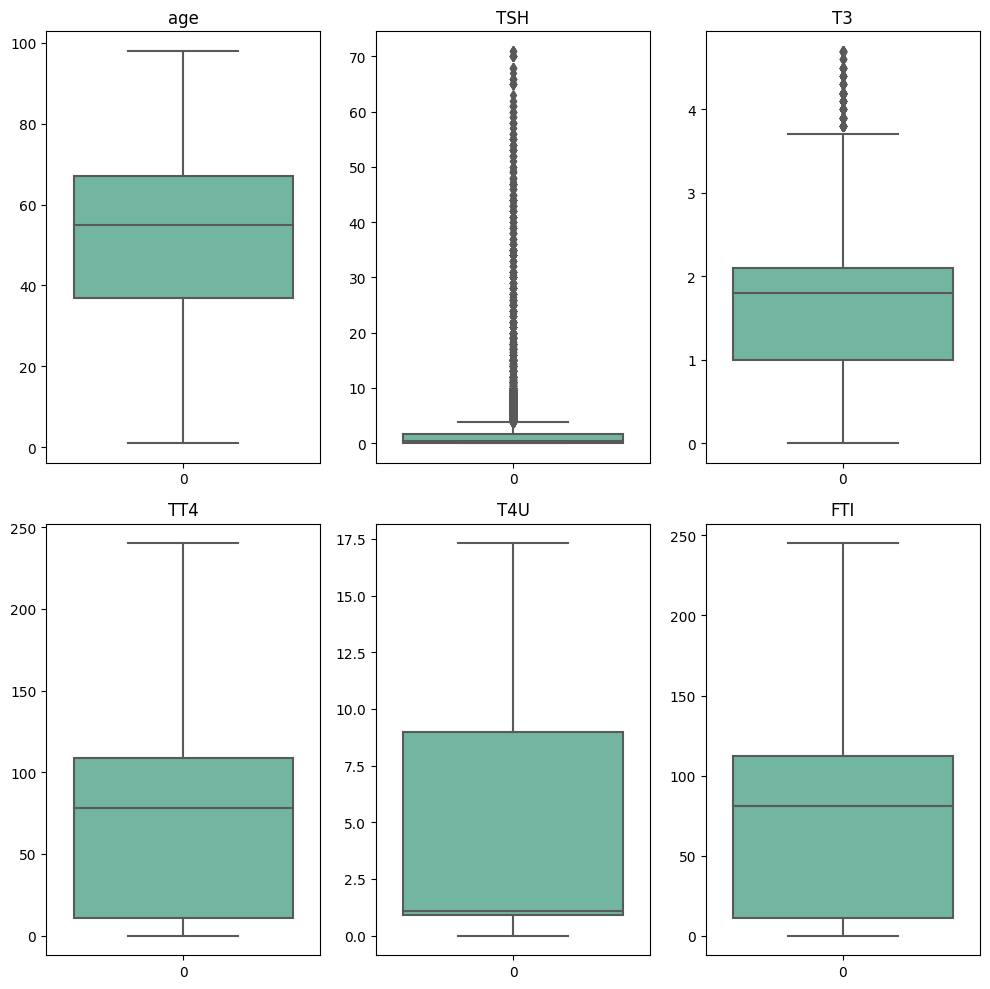

In [58]:
#Boxplot to detect outlier
numerical_col = non_outliers_data_frame.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

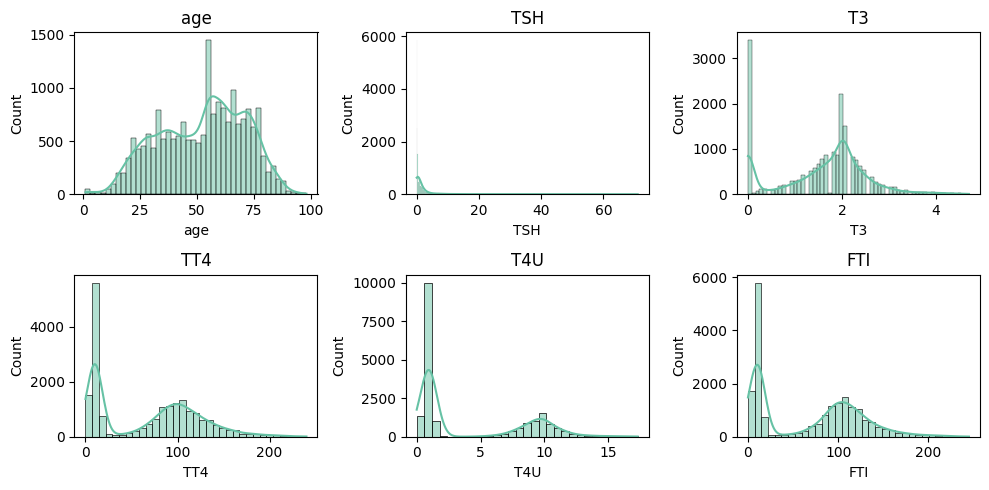

In [40]:
numerical_col = non_outliers_data_frame.select_dtypes(include=['float64'])
sns.set_palette("Set2")
fig,axes=plt.subplots(2,3,figsize=(10,5))
for ax,column in zip(axes.flatten(),numerical_col.columns):
    sns.histplot(data=non_outliers_data_frame,x=column,ax=ax,kde=True)
    ax.set_title(column, fontsize=12)
plt.tight_layout()


so we can observe that we have removed outliers and our distribution is looking much more gaussian, except that 0 which we have added erly on to replace NaNs

In [58]:
non_outliers_data_frame.shape

(19454, 22)

In [72]:
# data loss

df.shape[0]-non_outliers_data_frame.shape[0]
#607 outliers has been removed

607

#### List the categorical and numerical columns

In [87]:
data = non_outliers_data_frame


In [61]:


# List of numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns.tolist()

# List of categorical columns
categorical_columns = data.select_dtypes(exclude=['float64']).columns.tolist()
print(numerical_columns)

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Unique values in 'sex': ['f' 'm']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_medication': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['f' 't']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'class': ['negative' 'hyperthyroid' 'hypothyroid']


#### Replace categoric values with numeric values

In [88]:
# map sex column values to 0 and 1
data['sex'] = data['sex'].map({'f': 0, 'm': 1})

In [89]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,0.00,0.0,negative
2,46.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,0.0,109.0,0.91,120.0,negative
3,70.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,0.00,0.0,negative
4,70.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,negative


In [90]:
categorical_columns_to_convert = [
    'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
    'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre',
    'tumor', 'hypopituitary', 'psych'
]

In [91]:
# map all othere categorical function to 0 and 1
for column in categorical_columns_to_convert:
    if len(data[column].unique()) == 2:
       data[column] = data[column].map({'f': 0, 't': 1})

In [66]:
data.head(100)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,0.00,0.0,negative
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,0.0,109.0,0.91,120.0,negative
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,0.00,0.0,negative
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,39.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,4.30,2.4,135.0,1.51,89.0,negative
98,69.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.40,0.0,123.0,0.91,136.0,negative
99,48.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.30,1.6,86.0,0.93,92.0,negative
100,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,1.4,120.0,0.82,146.0,negative


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


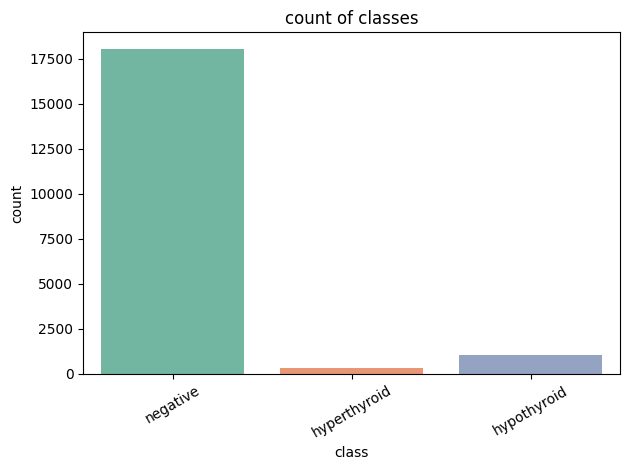

In [72]:
sns.set_palette("Set2")
sns.countplot(data=data,x=data['class'])
plt.xlabel('class')
plt.ylabel('count')
plt.title('count of classes')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

we can observe that the data is highly imbalanced and other classes are very less

In [92]:
class_counts = data['class'].value_counts()

In [93]:
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['class', 'count']

In [94]:
class_counts_df 

,class,count
0,negative,18071
1,hypothyroid,1060
2,hyperthyroid,323


check for duplicate data in the data frame

In [74]:
data.duplicated().sum()
#There are 10 duplicated value

1374

In [75]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

In [76]:
# Display duplicate rows (if any)
print("Duplicate Rows:")
duplicate_rows.head()

Duplicate Rows:


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
685,63.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,negative
2145,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,negative
7546,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,negative
7548,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,negative
7549,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,negative


In [77]:
class_counts = duplicate_rows['class'].value_counts()
class_counts

class
negative       1327
hypothyroid      47
Name: count, dtype: int64

eliminate duplicate rows

In [78]:
df_no_duplicates = data.drop_duplicates()

In [79]:
df_no_duplicates.shape

(18080, 22)

In [80]:
data=df_no_duplicates
print(data.shape)
data['class'].value_counts()

(18080, 22)


class
negative        16744
hypothyroid      1013
hyperthyroid      323
Name: count, dtype: int64

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


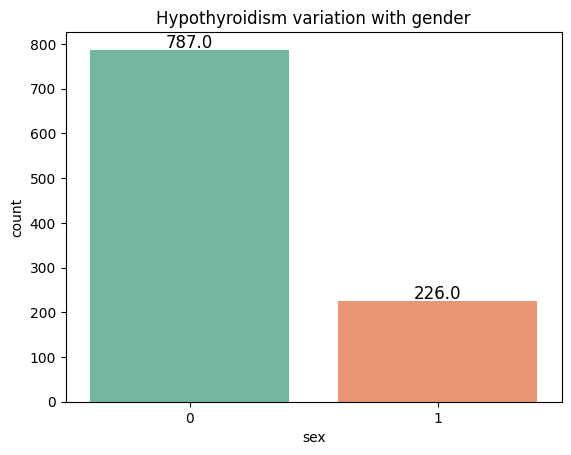

In [95]:
data_hypothyroid = data[data['class'] == 'hypothyroid']
ax = sns.countplot(x='sex', data=data_hypothyroid)

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Hypothyroidism variation with gender')
plt.show()

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


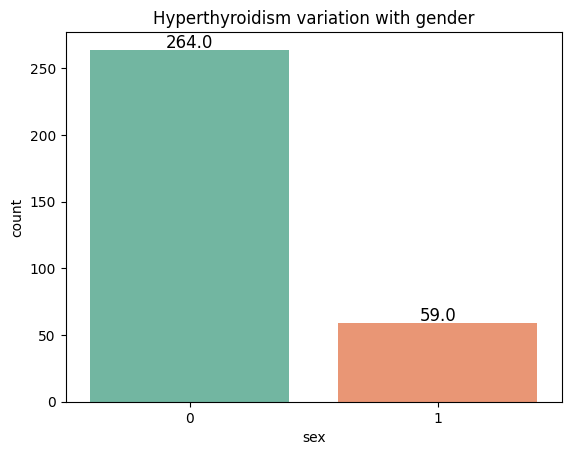

In [96]:
data_hyperthyroid = data[data['class'] == 'hyperthyroid']
ax = sns.countplot(x='sex', data=data_hyperthyroid)

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Hyperthyroidism variation with gender')
plt.show()

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


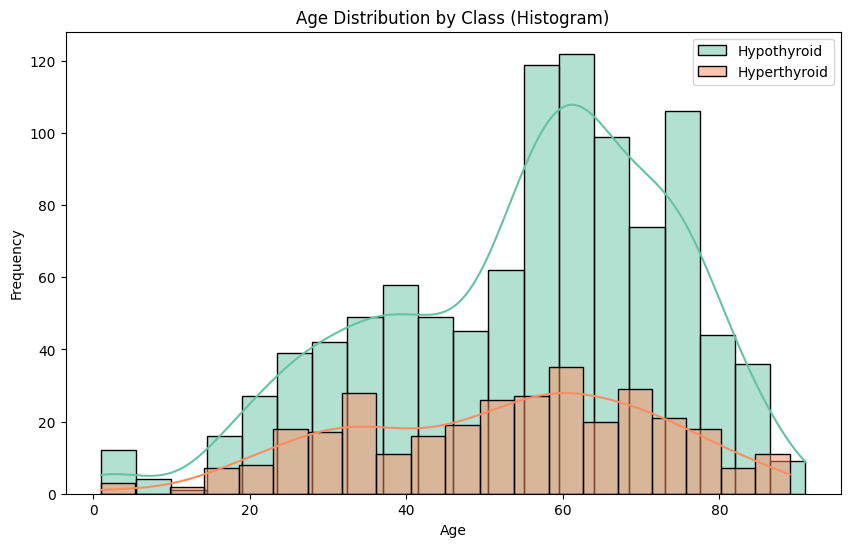

In [103]:

data_hypothyroid = data[data['class'] == 'hypothyroid']
data_hyperthyroid = data[data['class'] == 'hyperthyroid']


plt.figure(figsize=(10, 6))

sns.histplot(data_hypothyroid['age'], bins=20, alpha=0.5, label='Hypothyroid',kde=True)
sns.histplot(data_hyperthyroid['age'], bins=20, alpha=0.5, label='Hyperthyroid',kde=True)


plt.title('Age Distribution by Class (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

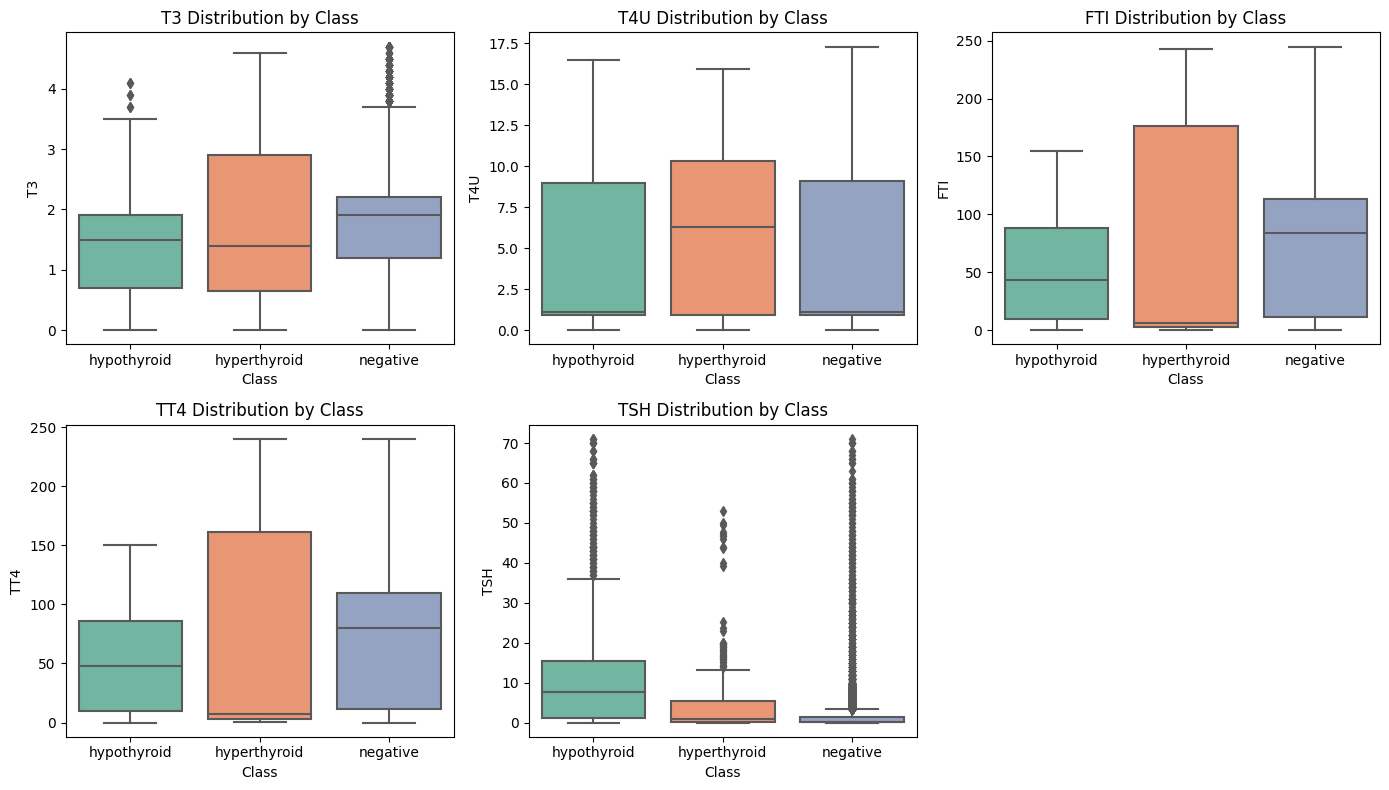

In [106]:
plt.figure(figsize=(14, 8))

# Create a box plot for each hormone
for hormone in ['T3', 'T4U', 'FTI', 'TT4', 'TSH']:
    plt.subplot(2, 3, [1, 2, 3, 4, 5][['T3', 'T4U', 'FTI', 'TT4', 'TSH'].index(hormone)])
    sns.boxplot(x='class', y=hormone, data=data, order=['hypothyroid', 'hyperthyroid', 'negative'])
    plt.title(f'{hormone} Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel(hormone)

plt.tight_layout()
plt.show()


## Insights
- Mostly people are normal. 
- only 1013 people have hypothyroidism out of 18080
- and 323 people have hyperthyroidism out of 18080
- It is observed that females have more hypothyroidism compared to males. out of 1013(diagnosed with hypothyroidism), only 226 are males and 787 are females.  
- same goes for hyperthyroidims. Out of 323(diagnosed with hyperthyroidism),59 are males and 264 are females.
- There is no specific age dependency but it can be obseved that people of around age 60 have more chances of diagnosed with hypothyroidism
- T3, FTI, and TT4 is generally higher in case of hyperthyroidism


As this data is higlhy imbalanced, apply SMOTE technique

## SMOTE


In [95]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = data.drop(columns=['class'])
y = data['class']

print("Class distribution before SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({'negative': 18071, 'hypothyroid': 1060, 'hyperthyroid': 323})


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [82]:
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
resampled_data.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,0.00,0.0,negative
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,0.0,109.0,0.91,120.0,negative
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,0.00,0.0,negative
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,negative


## Feature importance

                      Feature  Importance
16                        TSH    0.317566
18                        TT4    0.216250
20                        FTI    0.209513
19                        T4U    0.084309
17                         T3    0.078564
2                on_thyroxine    0.029245
1                         sex    0.023670
0                         age    0.015538
13                      tumor    0.005028
15                      psych    0.004148
10         query_hyperthyroid    0.003202
5                        sick    0.003163
9           query_hypothyroid    0.002633
7             thyroid_surgery    0.002424
12                     goitre    0.001125
4   on_antithyroid_medication    0.001100
6                    pregnant    0.000840
3          query_on_thyroxine    0.000746
8              I131_treatment    0.000731
11                    lithium    0.000202
14              hypopituitary    0.000003


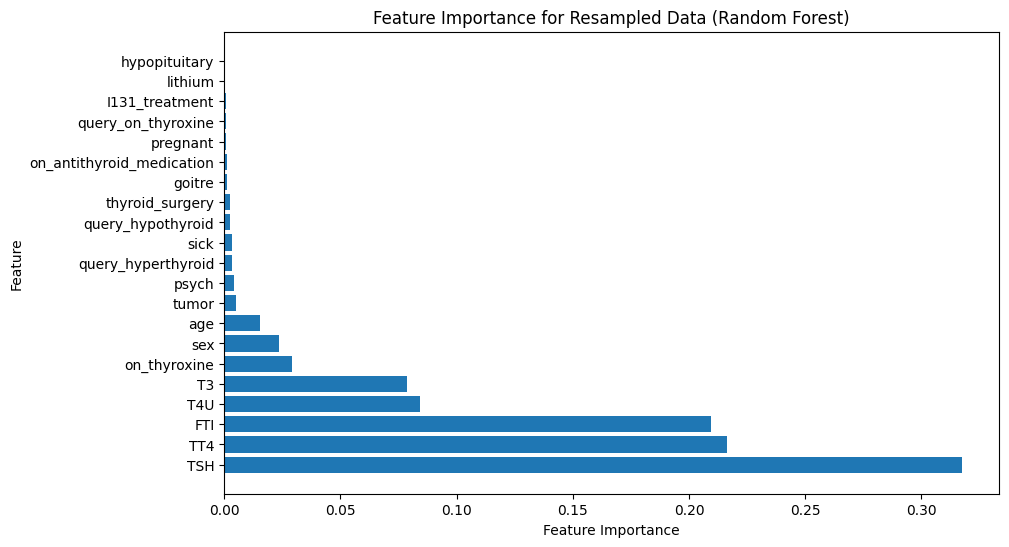

In [77]:

from sklearn.ensemble import RandomForestClassifier

X = X_resampled
y = y_resampled

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X, y)


feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Resampled Data (Random Forest)')
plt.show()


## Clustering

(50232, 21)


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1

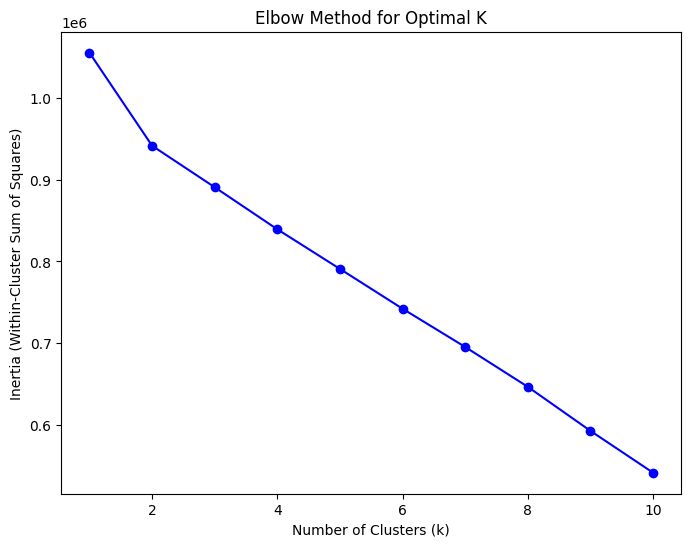

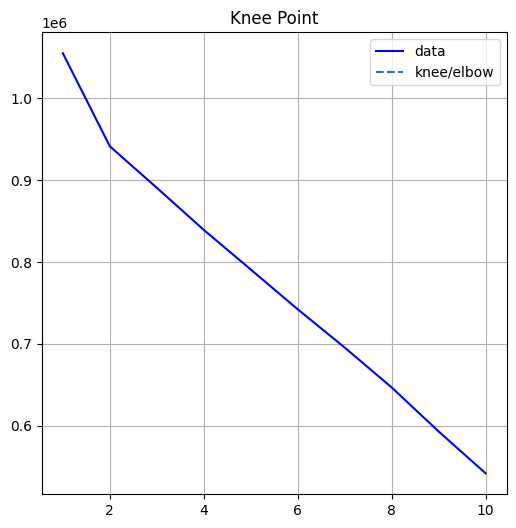

Optimal number of clusters (k): None


In [86]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

X=resampled_data.drop(columns=['class'])
print(X.shape)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_values = range(1, 11)  


inertia = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


knee_locator = KneeLocator(k_values, inertia,direction='decreasing',curve='convex')


plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
knee_locator.plot_knee()
plt.grid(True)
plt.show()


optimal_k = knee_locator.elbow

print(f'Optimal number of clusters (k): {optimal_k}')


In [80]:
#so, optimum 3 clusters should be there
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
resampled_data['cluster']=kmeans.fit_predict(X)

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [81]:
resampled_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class,cluster
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,negative,0
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,0.00,0.0,negative,1
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,0.0,109.0,0.91,120.0,negative,0
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,0.00,0.0,negative,0
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,negative,0


In [82]:
resampled_data['cluster'].value_counts()

cluster
1    25107
0    17673
2     7452
Name: count, dtype: int64

- 27,212 points fall in cluster 0
- 18,964 datapoints fall in cluster 1
- and only 8037 datapoints fall into cluster 2.


In [83]:
#Let's separate the clusters into different dataframes
data_0=resampled_data[resampled_data['cluster']==0]
data_1=resampled_data[resampled_data['cluster']==1]
data_2=resampled_data[resampled_data['cluster']==2]
#toal three dataframes formed named- data_0, data_1, and data_2 containing cluster0, 1, and 2 respectively.

In [84]:
print(data_0.shape)
print(data_1.shape)
print(data_2.shape)


(17673, 23)
(25107, 23)
(7452, 23)


## Machine learning algorithms

In [87]:
#one hot encoding of the target column
data_0_encoded = pd.get_dummies(data_0, columns=['class'], drop_first=True)
data_1_encoded = pd.get_dummies(data_1, columns=['class'], drop_first=True)
data_2_encoded = pd.get_dummies(data_2, columns=['class'], drop_first=True)



In [91]:
print(data_0_encoded.shape)
print(data_1_encoded.shape)
print(data_2_encoded.shape)

(27212, 24)
(18964, 24)
(8037, 24)


In [92]:
data_0_encoded.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,cluster,class_hypothyroid,class_negative
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,4.1,2.0,102.0,0.00,0.0,0,False,True
38,64.0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.00,0.0,0,False,True
39,44.0,1,0,0,0,0,0,0,0,0,...,0,0,45.0,1.4,39.0,1.16,33.0,0,False,True
53,53.0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,2.8,0.0,0.00,0.0,0,False,True
65,69.0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.00,0.0,0,False,True
